# Movielens Case Study by Meet S. Hariyani

### Importing Libreries

In [1]:
import pandas as pd
import numpy as numpy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import r2_score

### Importing Datasets

In [76]:
movies = pd.read_csv('movies.dat', sep = "::", names = ['MovieID', 'Title', 'Genres'], engine='python')

In [77]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [78]:
ratings = pd.read_csv('ratings.dat', sep="::",names=['UserID','MovieID', 'Rating','Timestamp'] ,engine='python')

In [79]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [80]:
users= pd.read_csv('users.dat',sep="::",names=["UserID","Gender","Age","Occupation","Zip-code"],engine='python')

In [81]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [82]:
movies.shape, users.shape,ratings.shape

((3883, 3), (6040, 5), (1000209, 4))

## Creating Master data.

In [83]:
movieRatings = pd.merge(movies,ratings, on="MovieID")
display(movieRatings.head())
display(movieRatings.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


(1000209, 6)

In [84]:
data = pd.merge(movieRatings,users, on="UserID")
display(data.head())
display (data.shape)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


(1000209, 10)

# Dataset exploration using visual representations.

### 1) User age distribution.

In [85]:
import matplotlib.pyplot as plt

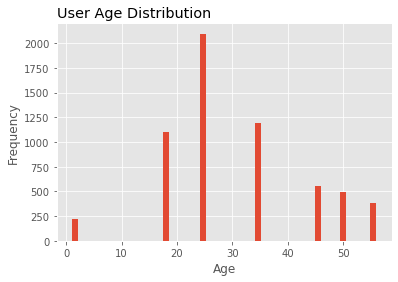

In [86]:
users.Age.plot.hist(bins=50)
plt.style.use('ggplot')       
plt.title('User Age Distribution',loc='left')
plt.xlabel('Age')
plt.show()

### 2) "Toy story" ratings by users.

In [87]:
toystoryRatings = data[data.MovieID==1] 
toystoryRatings.isnull().sum()

MovieID       0
Title         0
Genres        0
UserID        0
Rating        0
Timestamp     0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

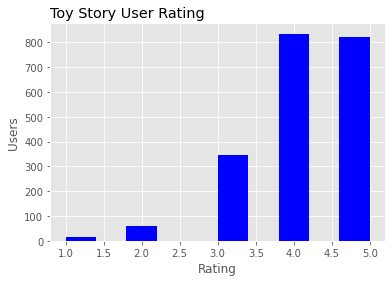

In [88]:
plt.hist(x=toystoryRatings['Rating'],                     color='blue')
plt.title('Toy Story User Rating',loc='left')
plt.ylabel('Users')
plt.xlabel('Rating')
plt.show()


In [89]:
print("Avrage ratings of Toystory movie :-",toystoryRatings['Rating'].mean())

Avrage ratings of Toystory movie :- 4.146846413095811


### 3) 25 top rating movies

In [90]:
topRatings = ratings.groupby(['MovieID'], as_index= False)
average_movie_ratings = topRatings.agg({'Rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


In [91]:
top_25_movies.head()

,MovieID,Rating
926,989,5.0
3635,3881,5.0
1652,1830,5.0
3152,3382,5.0
744,787,5.0


In [92]:
print(">Top 25 Movie by viewership raings.")
pd.merge(top_25_movies,movies)


>Top 25 Movie by viewership raings.


,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


### 4) Movies reviewed by UserID = 2696.

In [93]:
ratingbySpecificuser = ratings[ratings['UserID']== 2696]
ratingbySpecificuser_movieNames = pd.merge(ratingbySpecificuser,movies)
ratingbySpecificuser_movieNames.head()

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,2696,1258,4,973308710,"Shining, The (1980)",Horror
1,2696,1270,2,973308676,Back to the Future (1985),Comedy|Sci-Fi
2,2696,1617,4,973308842,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller
3,2696,1625,4,973308842,"Game, The (1997)",Mystery|Thriller
4,2696,1644,2,973308920,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller


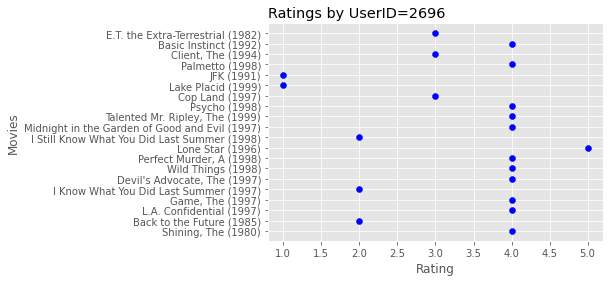

In [94]:
plt.scatter(x=ratingbySpecificuser_movieNames['Rating'], y=ratingbySpecificuser_movieNames['Title'], color='blue')
plt.title('Ratings by UserID=2696',loc='left')
plt.ylabel('Movies')
plt.xlabel('Rating')
plt.show()

## Future Engineering.

### 1) Finding Unique genres

In [95]:
dfGenres = data['Genres'].str.split("|")

In [96]:
listGenres = set()
for genre in dfGenres:
    listGenres = listGenres.union(set(genre))
listGenres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [97]:

len(listGenres)

18

In [98]:
genreEncoding = data['Genres'].str.get_dummies("|")
genreEncoding.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [99]:
masterData.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,...,0,0,0,1,0,1,0,0,0,0
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,...,0,0,0,0,0,0,0,0,0,0
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,...,1,0,0,0,0,0,1,0,0,0
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,...,0,0,0,0,0,0,0,0,1,0


In [100]:
masterData = pd.concat([data,genreEncoding],axis=1)

In [101]:
masterData.to_csv('masterdata_final.csv')

In [102]:
masterData.columns
masterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 28 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   MovieID      1000209 non-null  int64 
 1   Title        1000209 non-null  object
 2   Genres       1000209 non-null  object
 3   UserID       1000209 non-null  int64 
 4   Rating       1000209 non-null  int64 
 5   Timestamp    1000209 non-null  int64 
 6   Gender       1000209 non-null  object
 7   Age          1000209 non-null  int64 
 8   Occupation   1000209 non-null  int64 
 9   Zip-code     1000209 non-null  object
 10  Action       1000209 non-null  int64 
 11  Adventure    1000209 non-null  int64 
 12  Animation    1000209 non-null  int64 
 13  Children's   1000209 non-null  int64 
 14  Comedy       1000209 non-null  int64 
 15  Crime        1000209 non-null  int64 
 16  Documentary  1000209 non-null  int64 
 17  Drama        1000209 non-null  int64 
 18  Fantasy      1000209 n

### 3)features affecting the ratings of any particular movie.

In [103]:
affRating = data[:5000]
len(affRating)

5000

<AxesSubplot:>

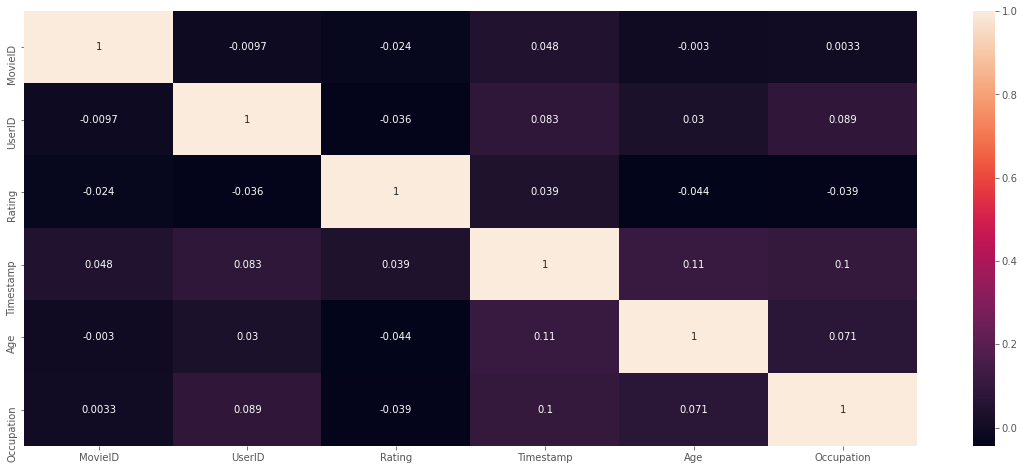

In [104]:
%matplotlib inline
plt.figure(figsize=(20,8))
corr = affRating.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})

### 4) Devloping Predictive Model.

In [105]:
sampledata = masterData[:100000]
x_feature = sampledata[['MovieID','Age','Occupation']].values
Y_target = sampledata[['Rating']].values

In [106]:
x_feature,Y_target

(array([[  1,   1,  10],
        [ 48,   1,  10],
        [150,   1,  10],
        ...,
        [441,  25,   0],
        [444,  25,   0],
        [445,  25,   0]], dtype=int64),
 array([[5],
        [5],
        [5],
        ...,
        [4],
        [2],
        [1]], dtype=int64))

In [119]:
x_train ,x_test ,y_train ,y_test = train_test_split(x_feature ,Y_target ,test_size=0.25 , random_state = 100)

In [120]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(75000, 3)
(25000, 3)
(75000, 1)
(25000, 1)


In [121]:
linreg = LinearRegression()

In [122]:
linreg.fit(x_train,y_train)

LinearRegression()

In [123]:
y_pred = linreg.predict(x_test)
print(y_pred[0:5])
print()
print(y_test[0:5])

[[3.76441944]
 [3.47935584]
 [3.6198211 ]
 [3.43664474]
 [3.42933374]]

[[5]
 [3]
 [4]
 [4]
 [3]]


### 5) Model Evolution.

In [145]:
print ("Mean squared error =",np.sqrt(mean_squared_error(y_test, y_pred)))
print()
print ("Rsqd = ", r2_score(y_test, y_pred))


Mean squared error = 1.1136414269479276

Rsqd =  0.005038622264263992
